# Libraries

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import os
import sklearn.preprocessing as pp
import sklearn.decomposition as skdecomp

# Paths & data

In [2]:
psm_path = '../../LargeFilesResults/PSM_analysis/'

In [3]:
uv_upturn = pd.read_csv(os.path.join(psm_path, 'uvupturn_psm.csv')).drop(['CATAID', 'UV_CLASS_YI2011'], axis=1)
uv_weak   = pd.read_csv(os.path.join(psm_path, 'uvweak_psm.csv')).drop(['CATAID', 'UV_CLASS_YI2011'], axis=1)

In [101]:
uv_upturn.keys()

Index(['mass_stellar_best_fit', 'ager_percentile50',
       'metalicity_Z_Zo_percentile50', 'sSFR_0_1Gyr_percentile50',
       'tform_percentile50', 'tlastb_percentile50', 'fb29_percentile50',
       'FUV-NUV', 'FUV-R', 'NUV-R'],
      dtype='object')

### Standardizing the samples

In [4]:
uv_upturn_std = pp.StandardScaler().fit_transform(uv_upturn)
uv_weak_std   = pp.StandardScaler().fit_transform(uv_weak)

## PCA projections

In [57]:
nc = 6

In [58]:
pca = skdecomp.PCA(n_components=nc)

In [86]:
pca_uvup = pca.fit_transform(uv_upturn_std)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
uvup_results = pd.DataFrame(pca.components_, columns=uv_upturn.columns, 
                               index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

[0.42422351 0.15942426 0.14826309 0.0999548  0.07160395 0.05352189]
0.9569915037914745


In [92]:
pca_uvwk = pca.fit_transform(uv_weak_std)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
uvwk_results = pd.DataFrame(pca.components_, columns=uv_upturn.columns, 
                            index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

[0.35612808 0.23472834 0.14078172 0.1133115  0.06846749 0.05536024]
0.968777368243052


In [62]:
pca_uvup_df = pd.DataFrame(data=pca_uvup, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_uvwk_df = pd.DataFrame(data=pca_uvwk, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
# pca_uvup_df = pd.DataFrame(data=pca_uvup, columns=['PC1', 'PC2'])
# pca_uvwk_df = pd.DataFrame(data=pca_uvwk, columns=['PC1', 'PC2'])

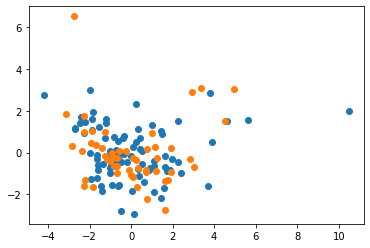

In [63]:
plt.plot(pca_uvup_df['PC1'], pca_uvup_df['PC2'], 'o')
plt.plot(pca_uvwk_df['PC1'], pca_uvwk_df['PC2'], 'o')

plt.show()

In [73]:
pca.explained_variance_

array([3.63250641, 2.39422912, 1.43597351, 1.15577731, 0.6983684 ,
       0.56467442])

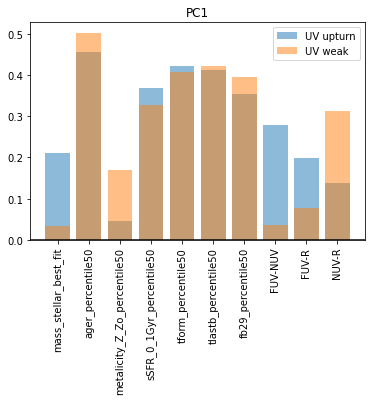

In [125]:
plt.title("PC1")
plt.bar(x=np.arange(0,10,1), height=np.abs(uvup_results.values[0,:]), label='UV upturn', alpha=0.5)
plt.bar(x=np.arange(0,10,1), height=np.abs(uvwk_results.values[0,:]), label='UV weak', alpha=0.5)
plt.axhline(y=0.0, c='black')
plt.legend(loc='best')
plt.xticks(np.arange(0,10,1), list(uvup_results.keys()), rotation=90)
plt.show()

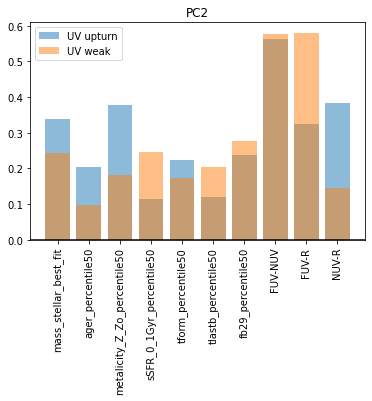

In [129]:
plt.title("PC2")
plt.bar(x=np.arange(0,10,1), height=np.abs(uvup_results.values[1,:]), label='UV upturn', alpha=0.5)
plt.bar(x=np.arange(0,10,1), height=np.abs(uvwk_results.values[1,:]), label='UV weak', alpha=0.5)
plt.axhline(y=0.0, c='black')
plt.legend(loc='best')
plt.xticks(np.arange(0,10,1), list(uvup_results.keys()), rotation=90)
plt.show()